In [2]:
# Question 1: Construct a data frame of first 20 and last records of the dataset. 
import pandas as pd

adult_data = pd.read_csv("adult.data")

adult_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship','race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Select the first 20 records
first_20 = adult_data.head(20)
# Select the last 20 records
last_20 = adult_data.tail(20)
# Concatenate the first and last 20 records into a new data frame
combined_data = pd.concat([first_20, last_20])

# Reset the index of the combined data frame if you want a continuous index
combined_data.reset_index(drop=True, inplace=True)

# Print the resulting data frame
print(combined_data)

    age          workclass  fnlwgt      education  education-num  \
0    50   Self-emp-not-inc   83311      Bachelors             13   
1    38            Private  215646        HS-grad              9   
2    53            Private  234721           11th              7   
3    28            Private  338409      Bachelors             13   
4    37            Private  284582        Masters             14   
5    49            Private  160187            9th              5   
6    52   Self-emp-not-inc  209642        HS-grad              9   
7    31            Private   45781        Masters             14   
8    42            Private  159449      Bachelors             13   
9    37            Private  280464   Some-college             10   
10   30          State-gov  141297      Bachelors             13   
11   23            Private  122272      Bachelors             13   
12   32            Private  205019     Assoc-acdm             12   
13   40            Private  121772      Assoc-vo

In [3]:
# Encode the data
from sklearn.preprocessing import LabelEncoder


# Replace unkown values with 'other'
unkown_category_columns = ['workclass', 'occupation', 'native-country']
for col in unkown_category_columns:
    adult_data[col] = adult_data[col].replace(to_replace =' ?', value = ' Unknown')

encoded_adult_data = adult_data.copy()

education_map = {' Preschool':0, ' 1st-4th':1, ' 5th-6th':2, ' 7th-8th':3, ' 9th':4, ' 10th':5, ' 11th':6, ' 12th':7, ' HS-grad':8, ' Prof-school':9, ' Bachelors':10, ' Some-college':11, ' Assoc-acdm':12, ' Assoc-voc':13, ' Masters':14, ' Doctorate':15}
encoded_adult_data["education"] = encoded_adult_data["education"].map(education_map)

encoder = LabelEncoder()
for c in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    encoded_adult_data[c] = encoder.fit_transform(encoded_adult_data[c])

# let's look at the percentage of NA
print(adult_data.isnull().mean())

print(adult_data.head(2))
print(encoded_adult_data.head(2))

# Observation:
# 

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64
   age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   

        marital-status          occupation    relationship    race    sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White   Male   
1             Divorced   Handlers-cleaners   Not-in-family   White   Male   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
   age  workcl

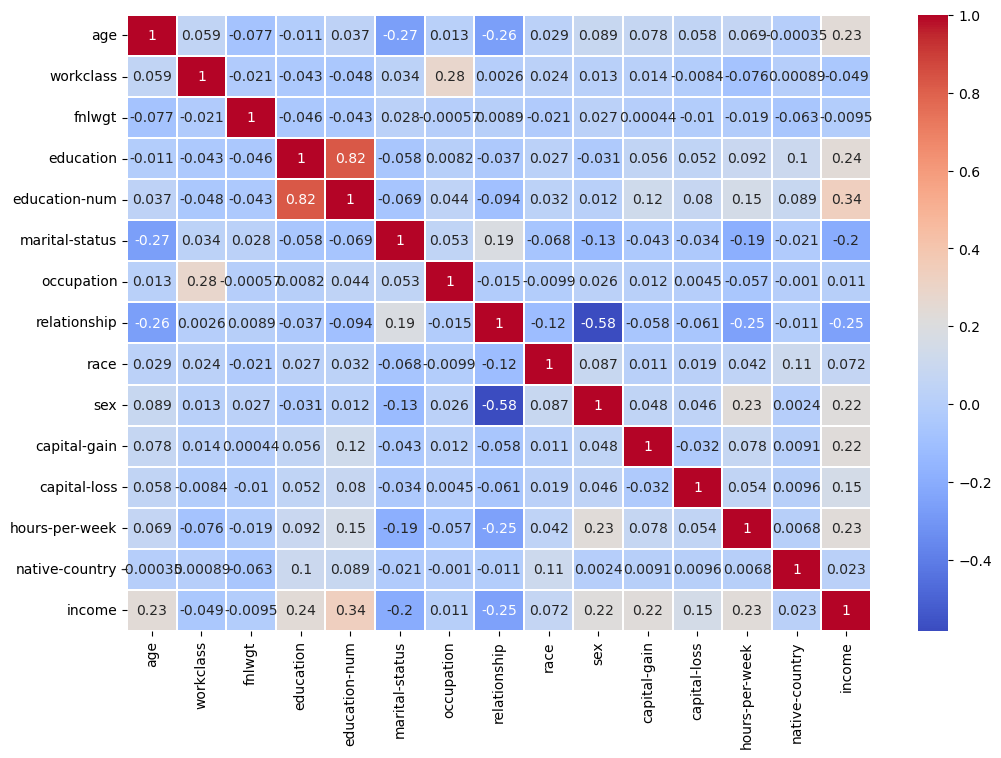

In [15]:
# Question 2: Investigate the presence of correlated variables.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# plotting the heatmap
hm = sns.heatmap(encoded_adult_data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.2)
  
# displaying the plotted heatmap
plt.show()

# The Corelation Plot Observations:
# 1. It looks like age, education/education-num, sex, capital-gain and capital-loss has good corelation with income i.e target variable.
# 2. (Workclass and Occupation), (Maraital-Status and Relationship), (sex and hours-per-week) has good corelation


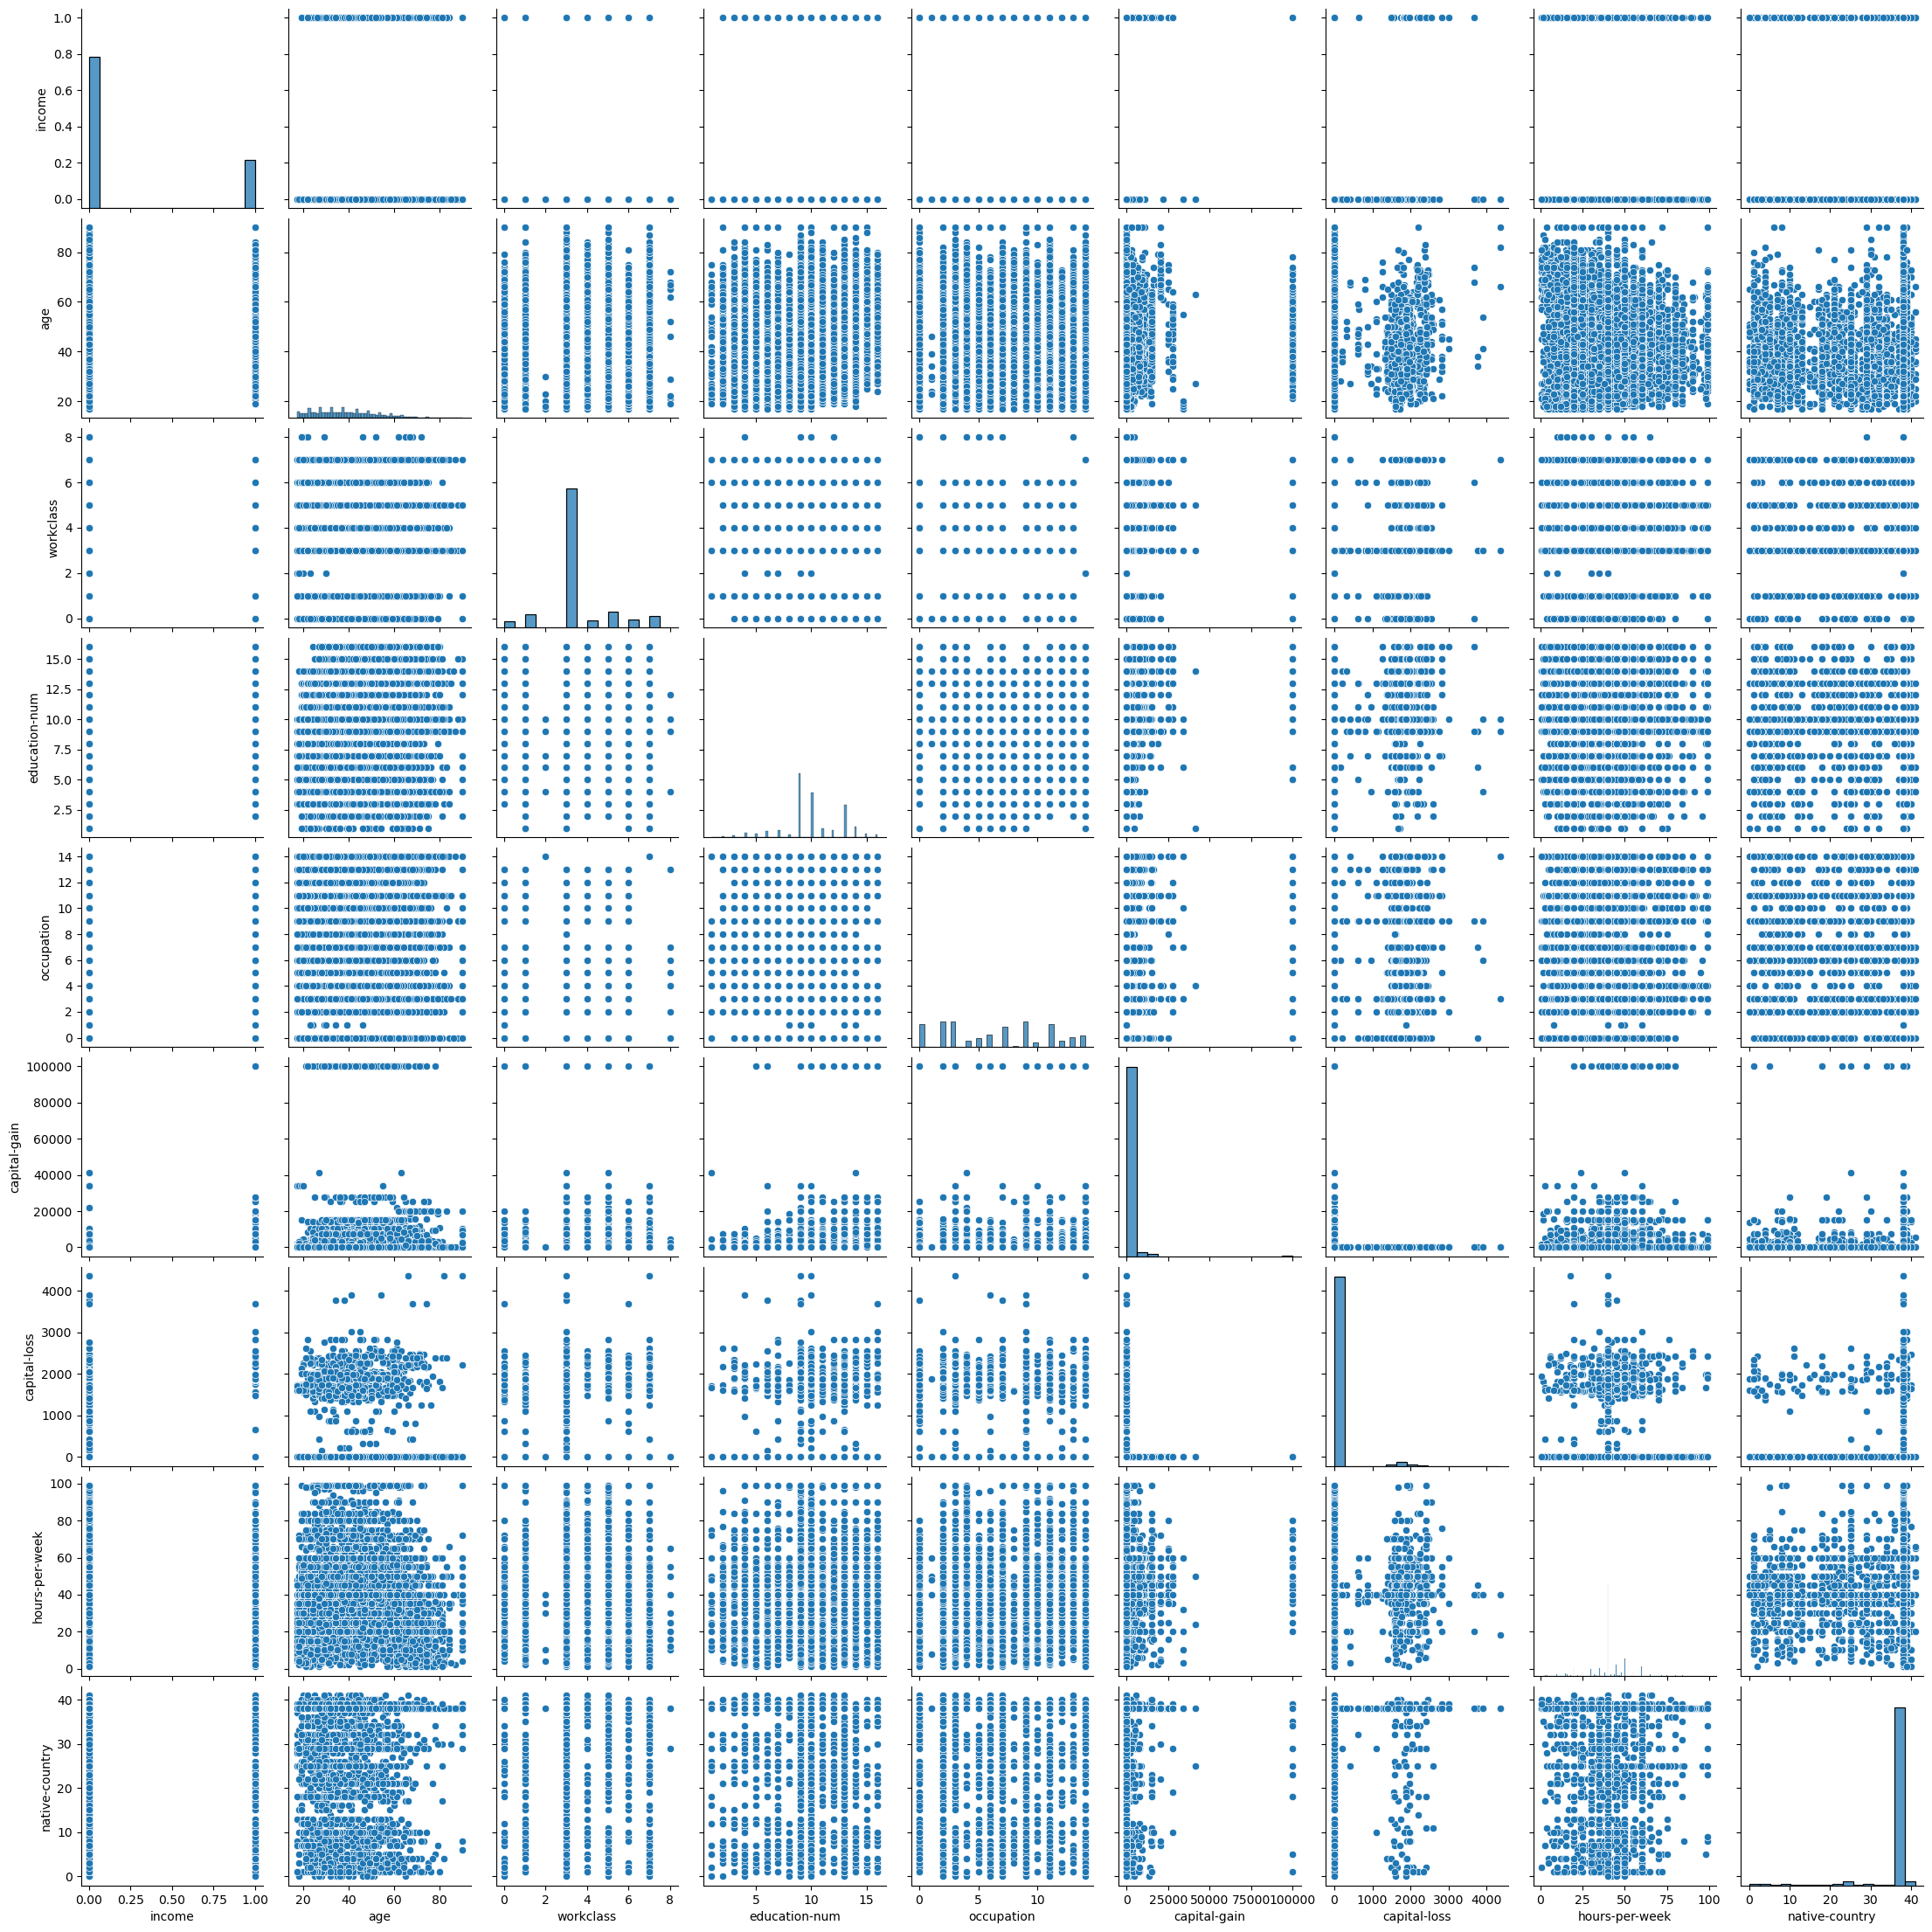

In [16]:
# Question 2: Investigate the presence of correlated variables.

sns.pairplot(encoded_adult_data, vars=['income', 'age', 'workclass', 'education-num', 'occupation', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])
plt.show()

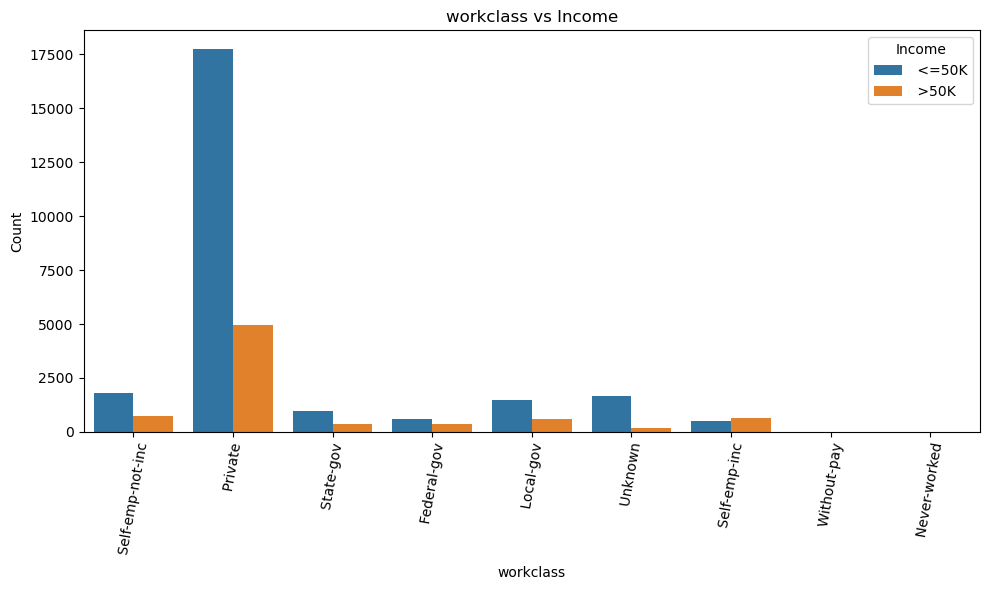

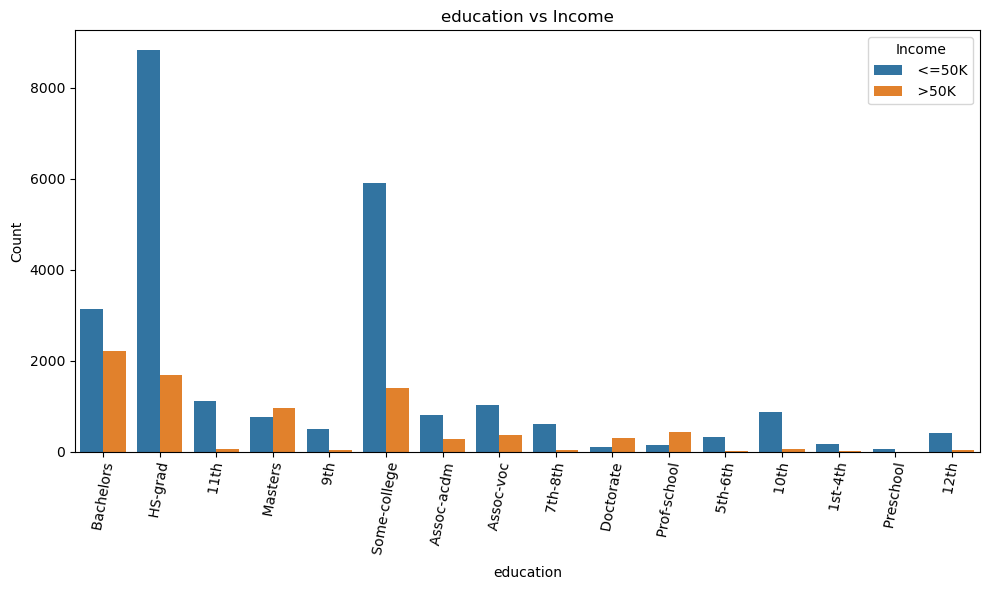

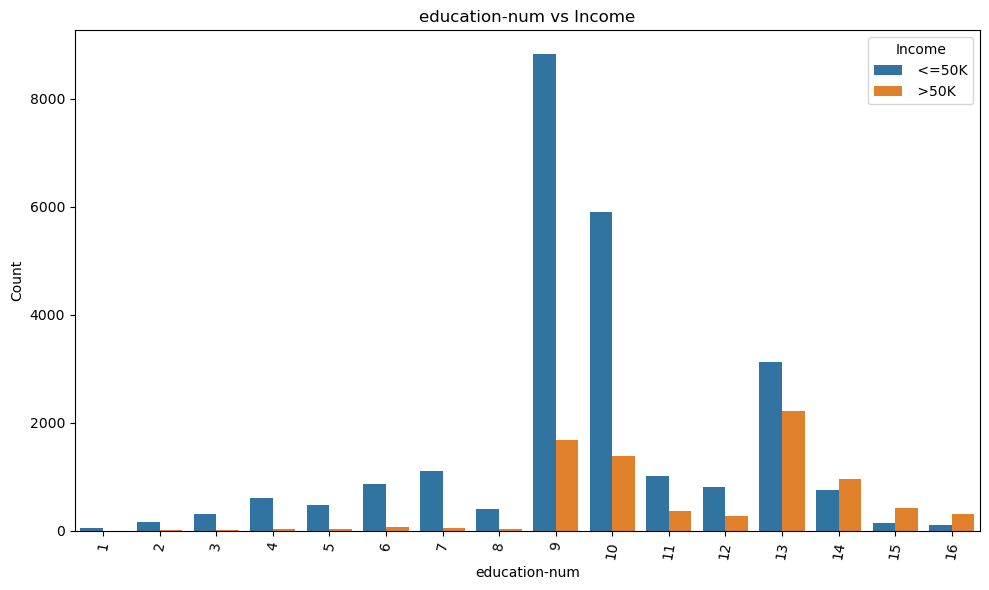

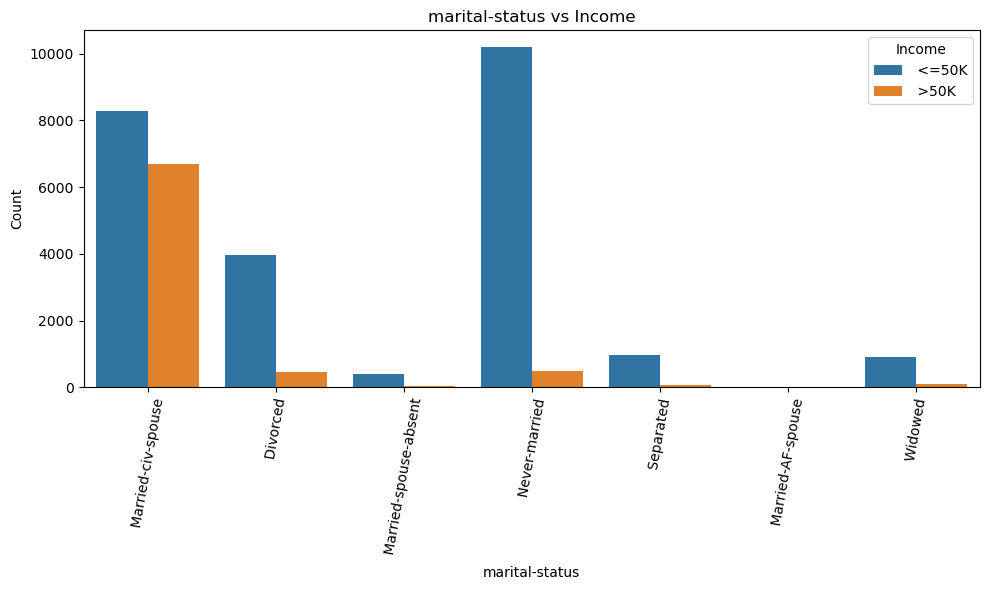

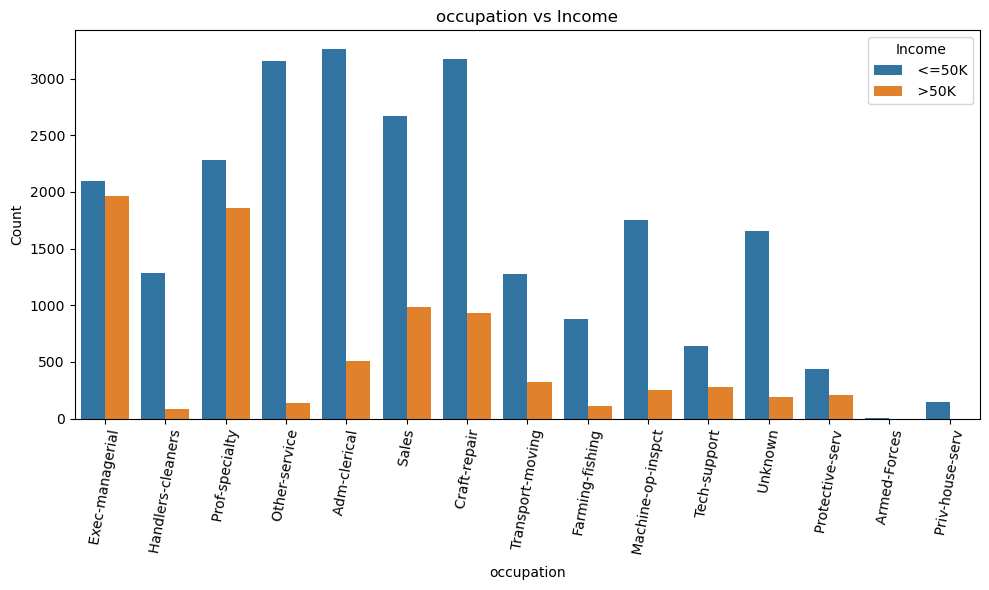

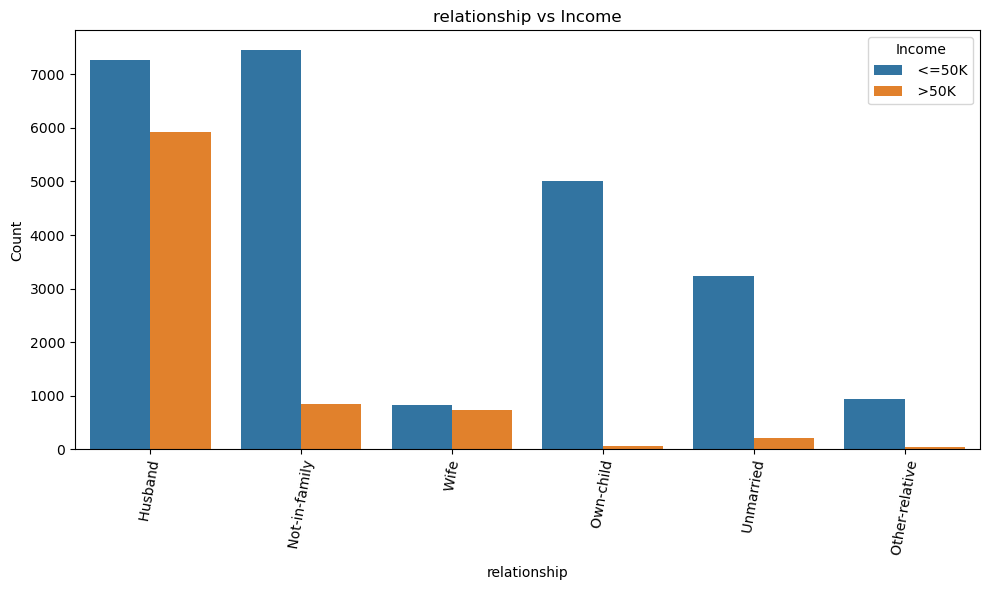

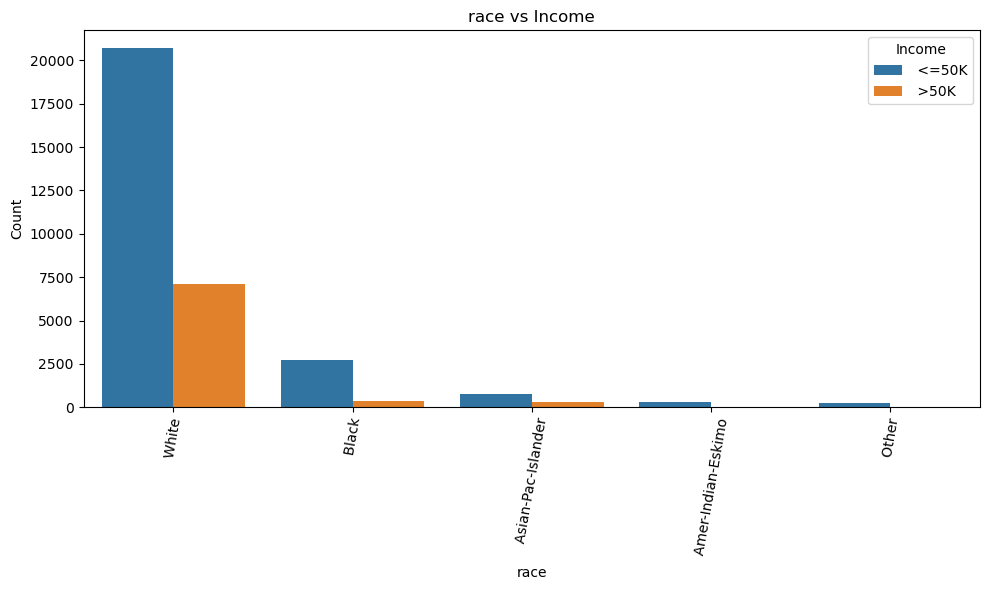

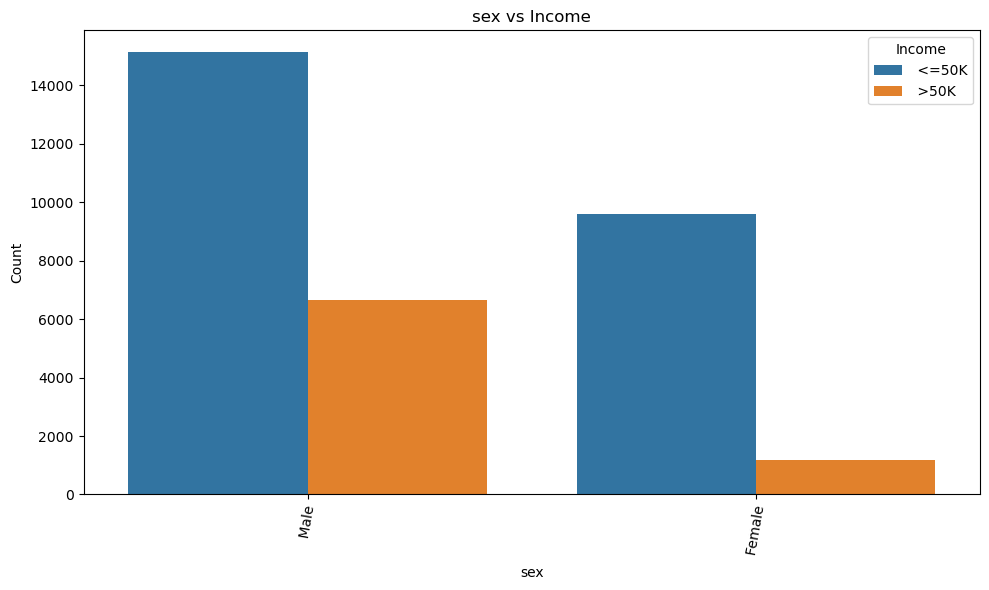

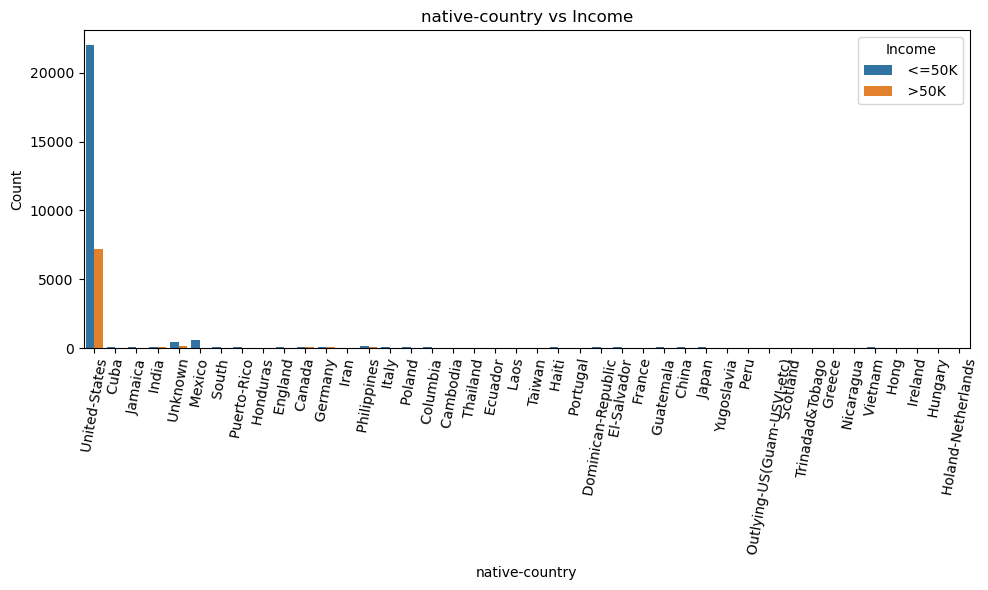

In [6]:
# Question 3. For each of the categorical variables, construct a bar chart of the variable, with an overlay of the target variable

# Define categorical variables
categorical_vars = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Create bar charts for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=adult_data, x=var, hue='income')
    plt.title(f'{var} vs Income')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=80)
    plt.legend(title='Income', loc='upper right')
    plt.tight_layout()
    plt.show()
    
# As per the pairplot: 
#    1. fnlwgt seems to be related with workclass column. We see bell curve there.
#    2. education and education-num seems to be linerly proportional. It looks like education-num is numerical representation of education
#
# As per the heatmap:
#    1. Age, Education/Education_num, sex, Capital-Gain and Capital-loss and hours-per-week has good corelation with income.
#
# As per the countplot observation: 
#    1. Workclass, Marital-status, Relationship, Race and native-country feature's data distribution across its category is baised. So we can ignore this feature as it could skew the model in one direction.
#    2. In case of Occupation, Exec-Managarial and Prof-specialty likely to have >50. The chances are closely 40%. The other occupation will have <=50 with probability less than 20%
#    3. In case of Gender, Male would have more chance to have income >50 than Female. The possibility to have income >50 to male is ~ 45% where as female ~ 20%.
#    4. In case of Education, Prof-school, Doctorate, Master and Bachelors will have high chances of income >50 than the other education.


In [7]:
# Question 4. For each pair of categorical variables, construct a cross tabulation.

import pandas as pd

# List of categorical variables
categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Create cross-tabulations for each pair of categorical variables
for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]
        cross_tab = pd.crosstab(adult_data[var1], adult_data[var2])
        
        # Print the cross-tabulation table and discuss the results
        print(f"********* Cross-tabulation between {var1} and {var2}:\n")
        print(cross_tab)
        print("\n")

# Obervations:
# There is baised sample of classwork. Majority of samples are from private class-work. The 'without-pay' classwork seems to be outlier as there are only total 13 records.
# There are least sample data for Armed-Forces in occupation.

********* Cross-tabulation between workclass and education:

education           10th   11th   12th   1st-4th   5th-6th   7th-8th   9th  \
workclass                                                                    
 Federal-gov           6      9      5         0         1         2     3   
 Local-gov            31     36     19         4         9        28    23   
 Never-worked          2      1      0         0         0         1     0   
 Private             695    923    333       136       266       424   387   
 Self-emp-inc         19     14      7         2         4        14    10   
 Self-emp-not-inc     67     60     19        13        19        94    34   
 State-gov            13     14     10         1         4        10     6   
 Unknown             100    118     40        12        30        72    51   
 Without-pay           0      0      0         0         0         1     0   

education           Assoc-acdm   Assoc-voc   Bachelors   Doctorate   HS-grad  \


********* Cross-tabulation between education and occupation:

occupation      Adm-clerical   Armed-Forces   Craft-repair   Exec-managerial  \
education                                                                      
 10th                     38              0            170                24   
 11th                     67              0            175                34   
 12th                     38              1             58                13   
 1st-4th                   0              0             23                 4   
 5th-6th                   6              0             43                 1   
 7th-8th                  11              0            116                19   
 9th                      14              0             96                13   
 Assoc-acdm              193              0            115               145   
 Assoc-voc               167              0            252               150   
 Bachelors               505              1            226

********* Cross-tabulation between marital-status and sex:

sex                      Female   Male
marital-status                        
 Divorced                  2672   1771
 Married-AF-spouse           14      9
 Married-civ-spouse        1657  13319
 Married-spouse-absent      205    213
 Never-married             4767   5915
 Separated                  631    394
 Widowed                    825    168


********* Cross-tabulation between marital-status and native-country:

native-country           Cambodia   Canada   China   Columbia   Cuba  \
marital-status                                                         
 Divorced                       0       16       5          6     15   
 Married-AF-spouse              0        0       0          0      0   
 Married-civ-spouse            11       63      50         19     49   
 Married-spouse-absent          1        3       6          5      3   
 Never-married                  7       33      11         20     18   
 Separated  

********* Cross-tabulation between occupation and income:

income               <=50K   >50K
occupation                       
 Adm-clerical         3262    507
 Armed-Forces            8      1
 Craft-repair         3170    929
 Exec-managerial      2098   1968
 Farming-fishing       879    115
 Handlers-cleaners    1284     86
 Machine-op-inspct    1752    250
 Other-service        3158    137
 Priv-house-serv       148      1
 Prof-specialty       2281   1859
 Protective-serv       438    211
 Sales                2667    983
 Tech-support          645    283
 Transport-moving     1277    320
 Unknown              1652    191


********* Cross-tabulation between relationship and race:

race              Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other  \
relationship                                                                
 Husband                          92                  410     671      80   
 Not-in-family                    81                  214     812      

In [8]:
# Question 6: Report the mean, median, minimum, maximum and standard deviation of each of the numeric variables

# Numerical columns
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
# Calculate the statistics for numeric variables
numeric_stats = adult_data[numeric_columns].describe()

print(numeric_stats)

print("\nMedian:")
print(adult_data[numeric_columns].median())



                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Median:
age                   37.0
fnlwgt            178363.0


In [9]:
# Question 5: Report on whether anomalous fields exist in this dataset, based on your EDA, which are these fields and what should be done about it.
# 1. As per the dataframe numeric field describe, capital-gain and capital-loss seems to be anamalous field because:
#    (a) its min - max range is very high.
#    (b) their 25%, 50% and 75% percentiles are zero.
# So, it can skew the result and make it baised.
#
# As per the categorical field barchart: Marital-status, Relationship, Race and native-country feature's data distribution across its category is baised. So these seems analomous fields.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


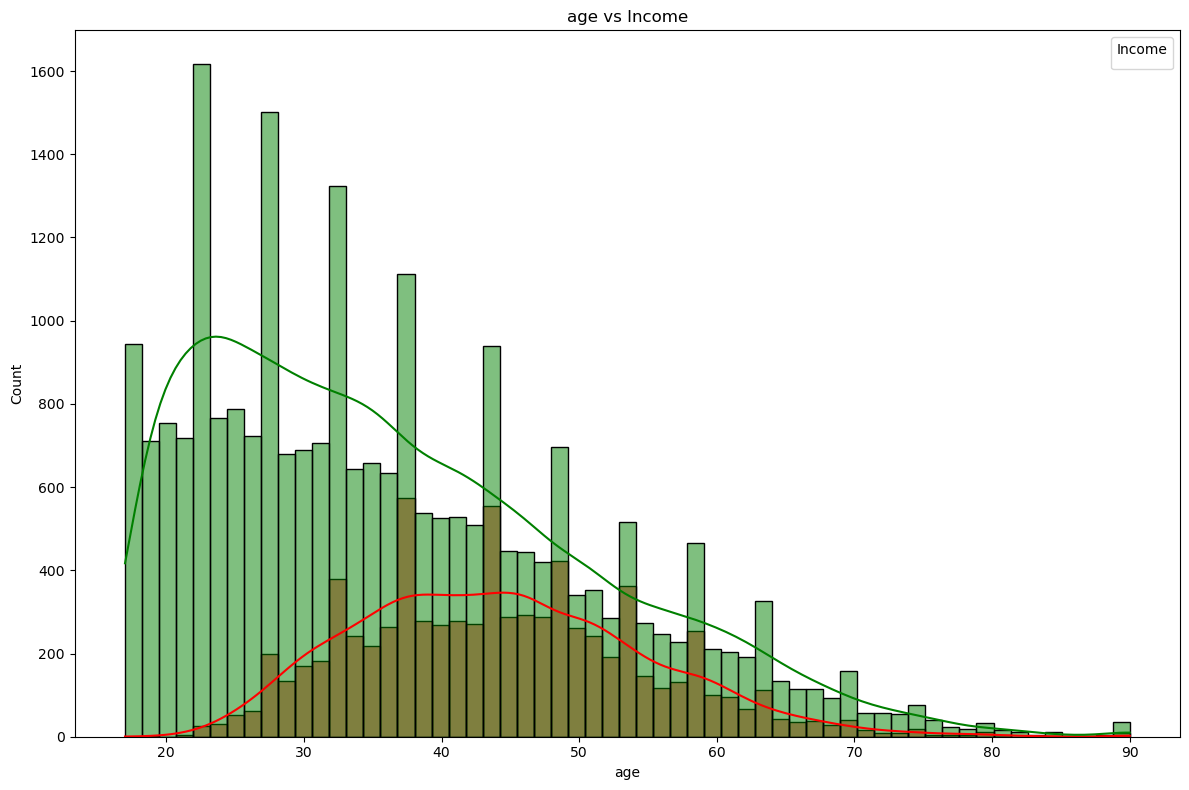

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


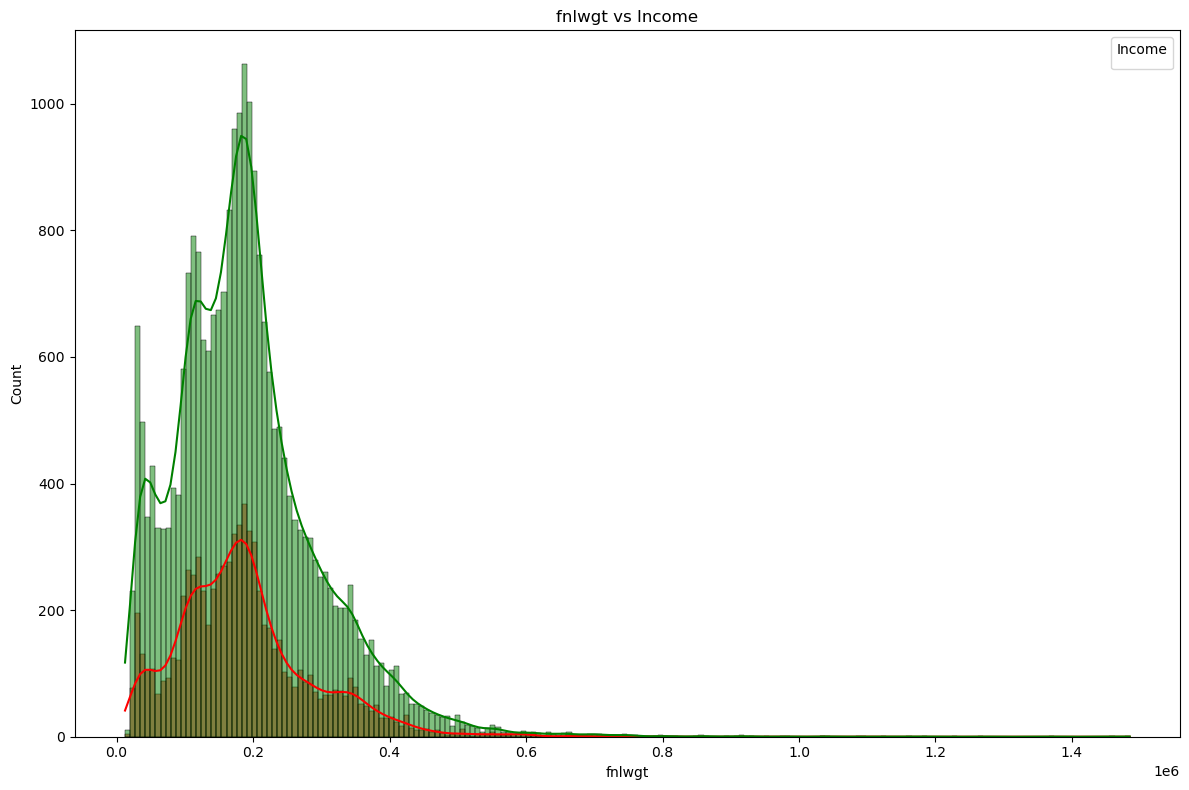

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


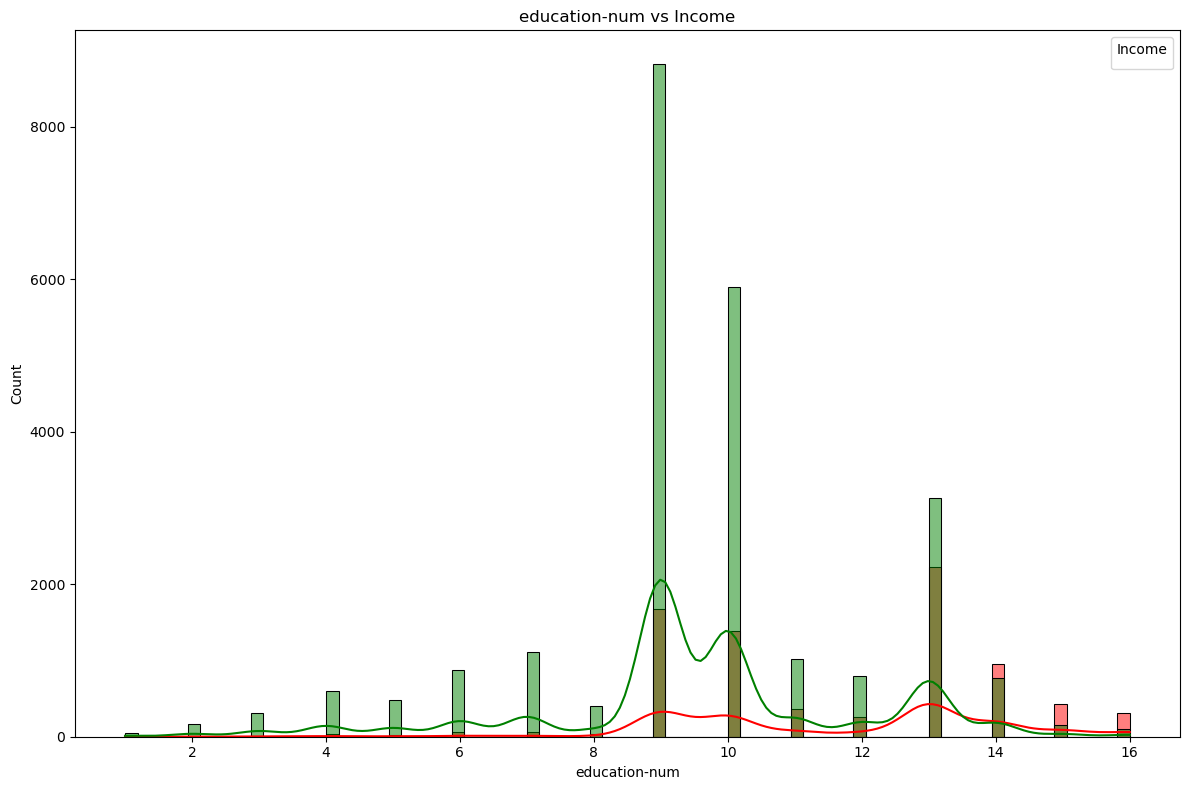

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


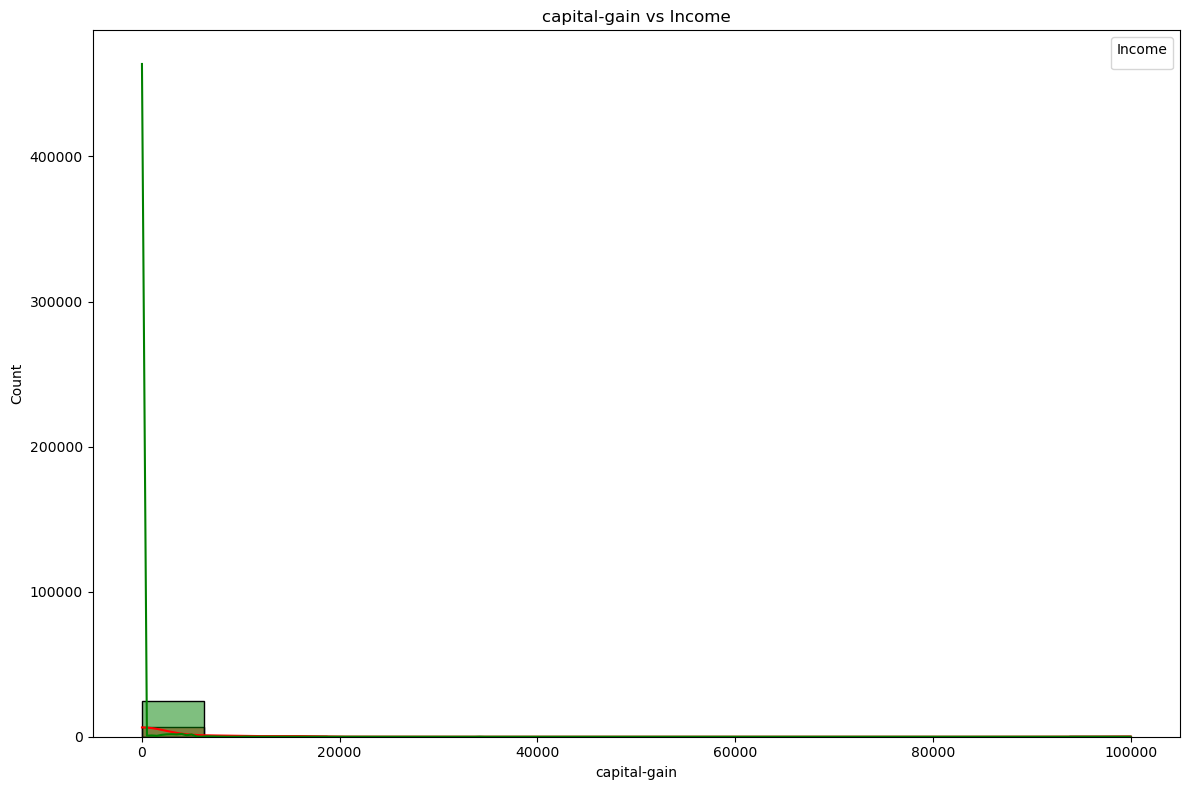

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


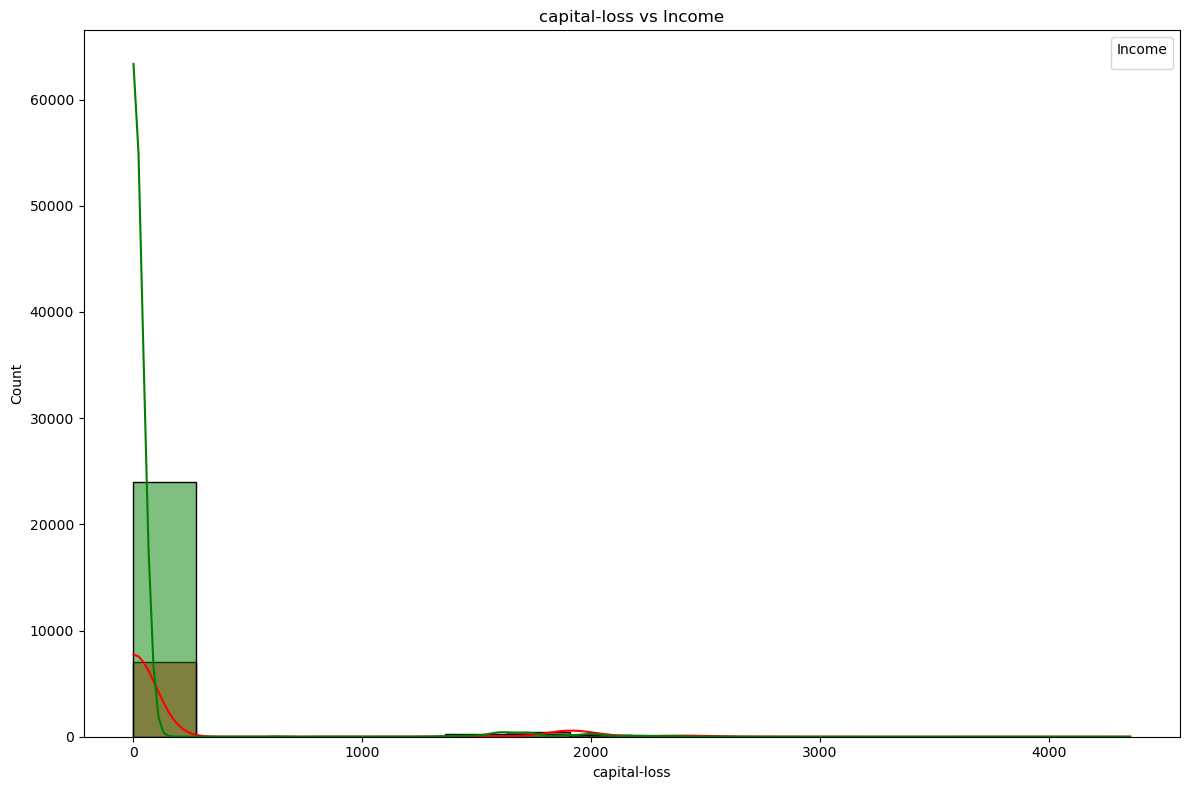

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


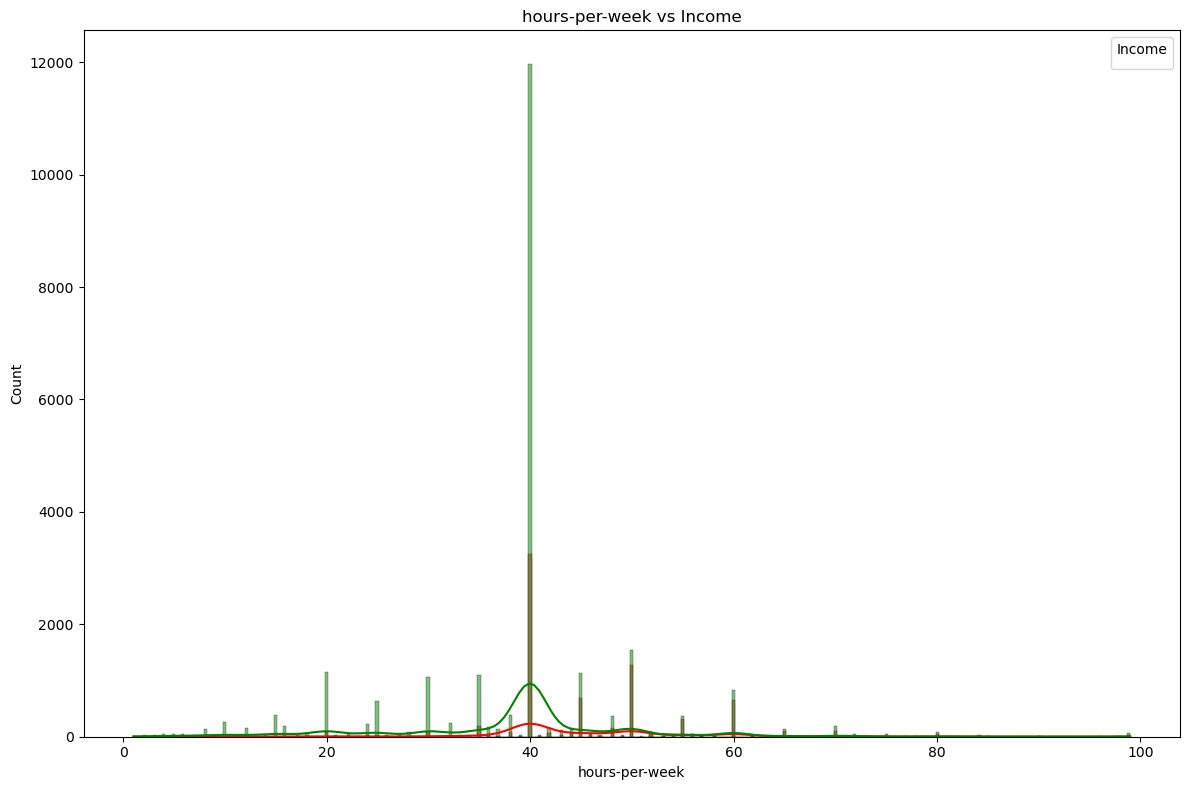

In [10]:
# Ans 7: Construct a histogram of each numerical variables, with an overlay of the target variable income.

import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical variables
numeric_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create histograms with overlay of 'income'
for var in numeric_vars:
    plt.figure(figsize=(12, 8))
    sns.histplot(data=adult_data, x=var, hue='income', kde=True, palette=['green', 'red'], alpha=0.5) #, hue_order=adult_data.income.unique())
    plt.title(f'{var} vs Income')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Income', loc='upper right')
    plt.tight_layout()
    plt.show()


In [11]:
# Question 7: Continued

# Histogram Observation:
# Age vs Income: It has significance on income target variable. It is observed that the age between 35 to 58 have good chances to earn >50
# fnlwgt vs income: We are getting good bell curve for >50 and <=50 income variable. But there is long tail after 0.5e6. We cannot conclude if it has significance on income target variable.
# There are no significance of capital-gain and capital-loss.
# education-num vs Income: The education-num 13, 14, 15 and 16 are likely get >50 income. However, there are not much data samples for 15 and 16. But, we can say it has significance on income target variable because enducation-num is ordinal data and the value greater than or equal to 13 will likely have >50 income
# hours-per-week vs Income: It looks like hours-per-week aorund 50 are getting >50 income but the data distribution is around 40 hours-per-week is much higher than other hours-per-week values. so, we cannot conclude the significance of hours-per-week on income.

# So, Age and education-num has significance on income target variable.
# We conculde significance of hours-per-week and fnlwgt on income target variable are not much.

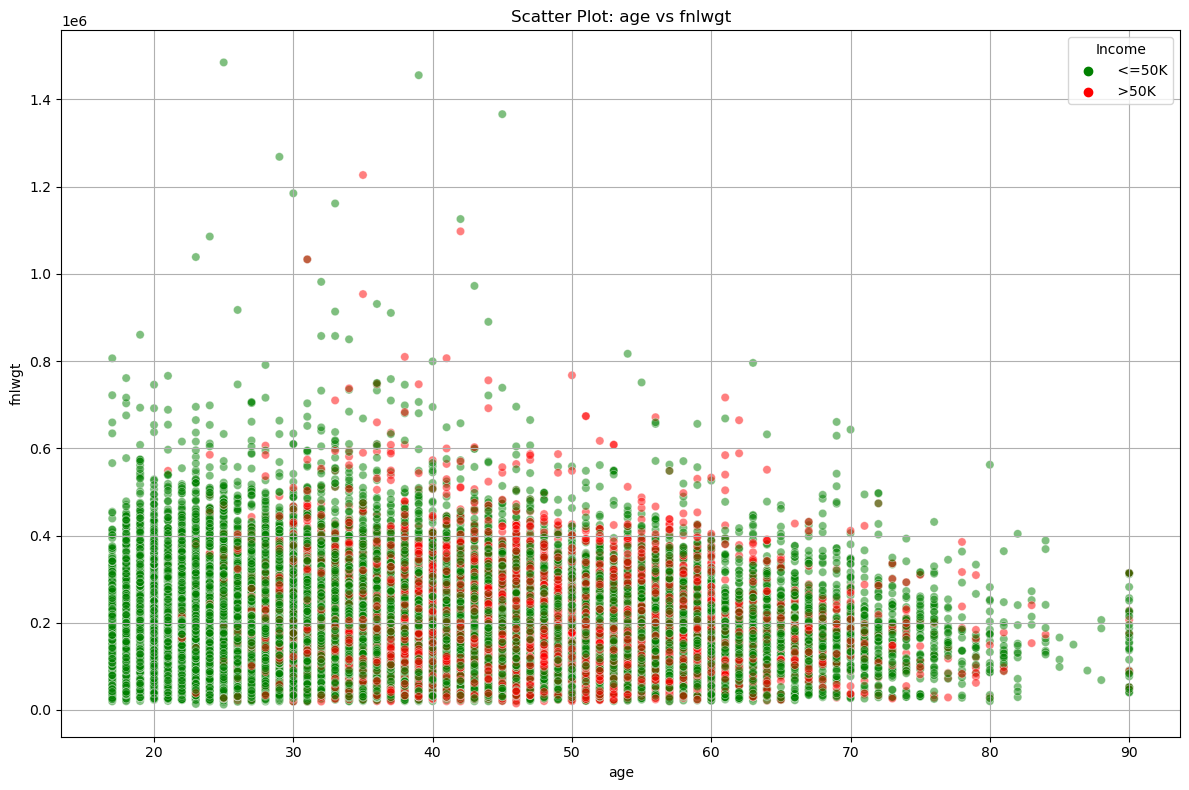

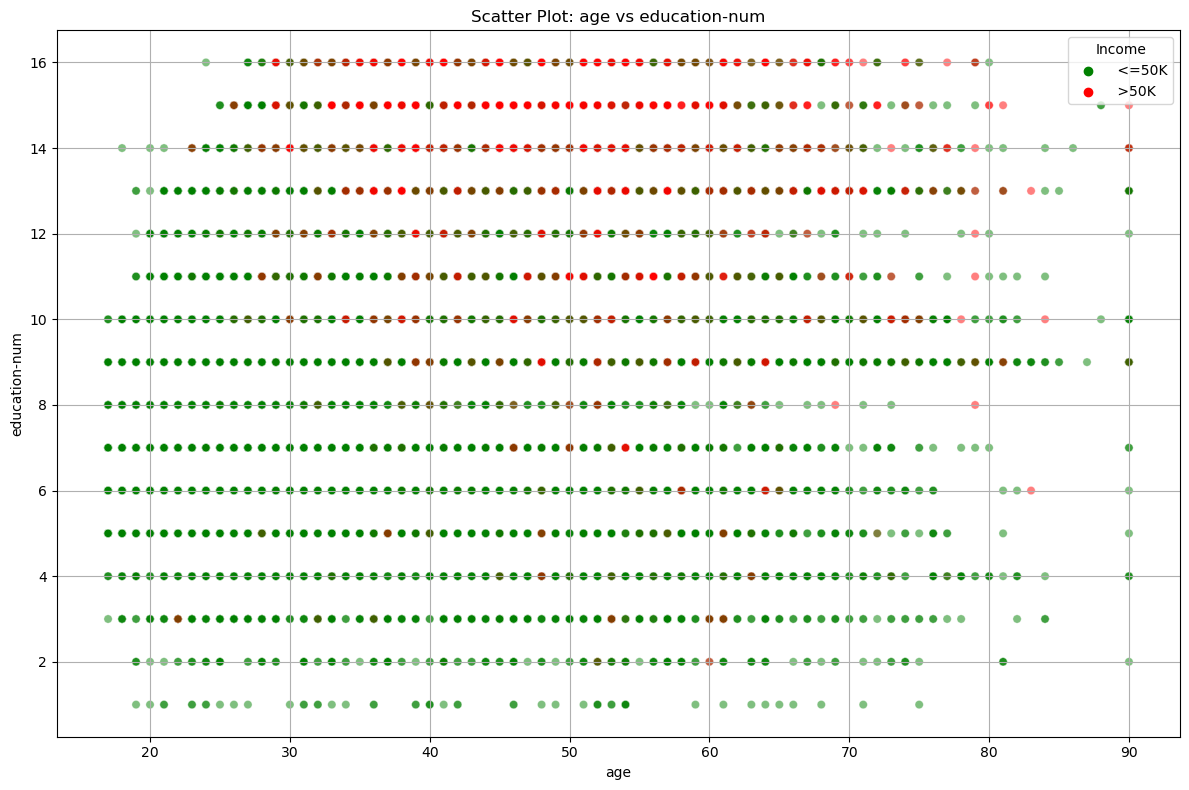

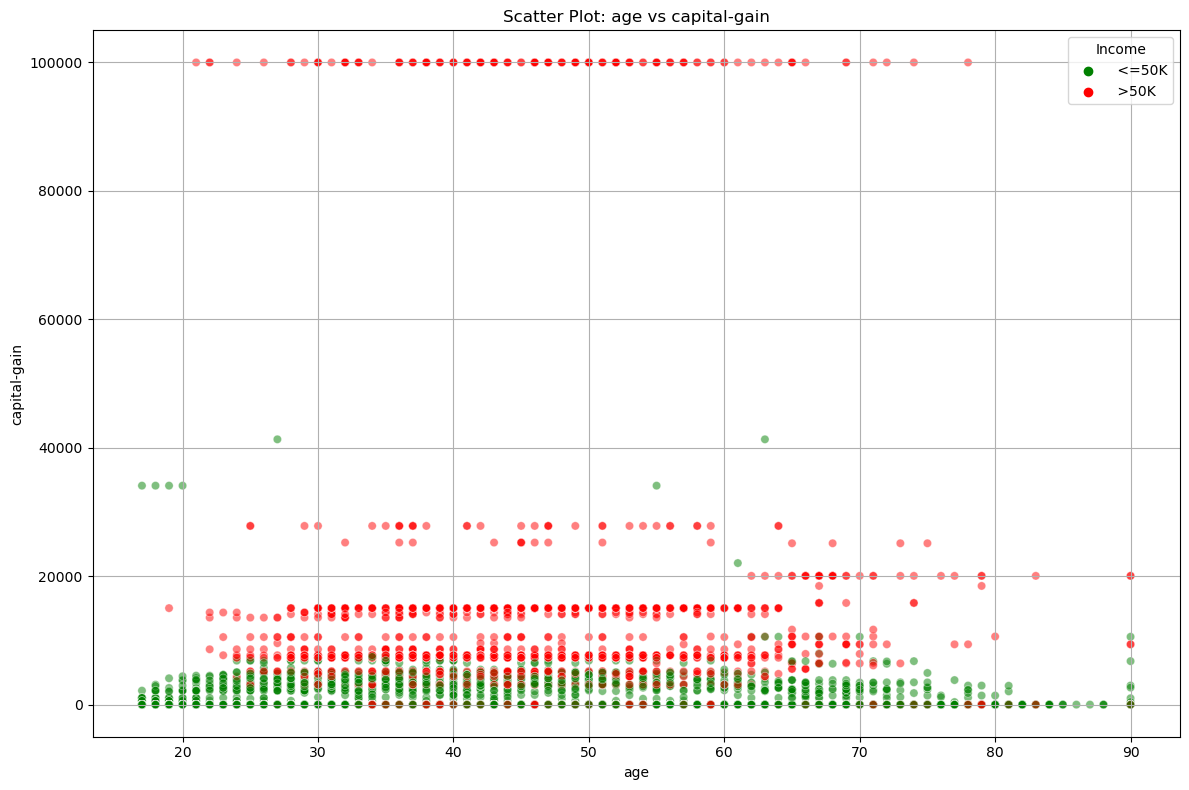

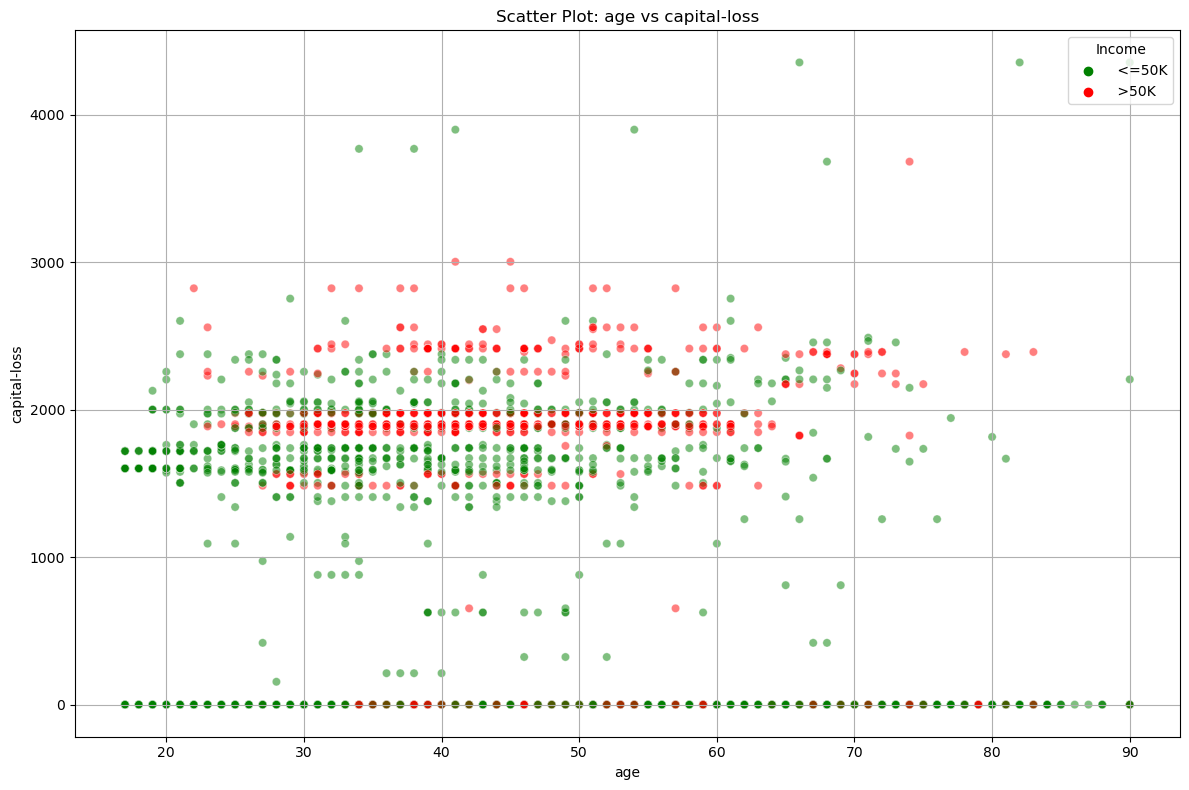

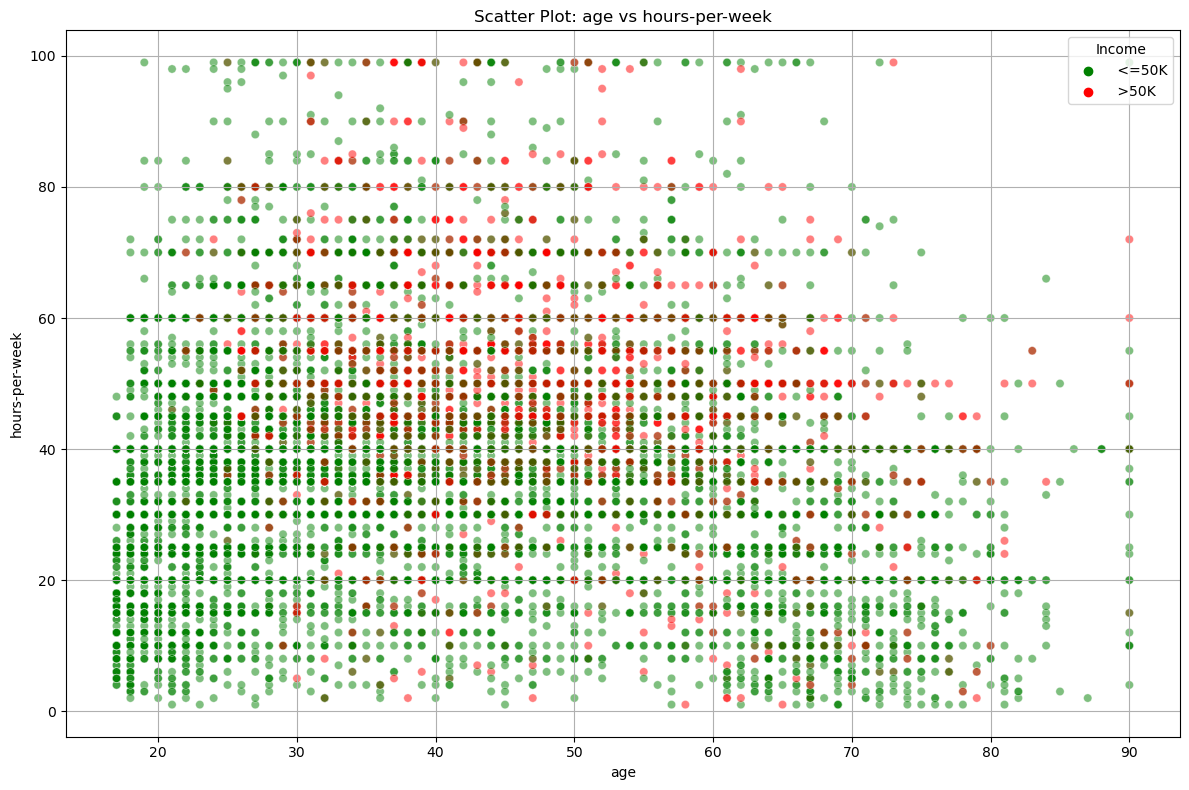

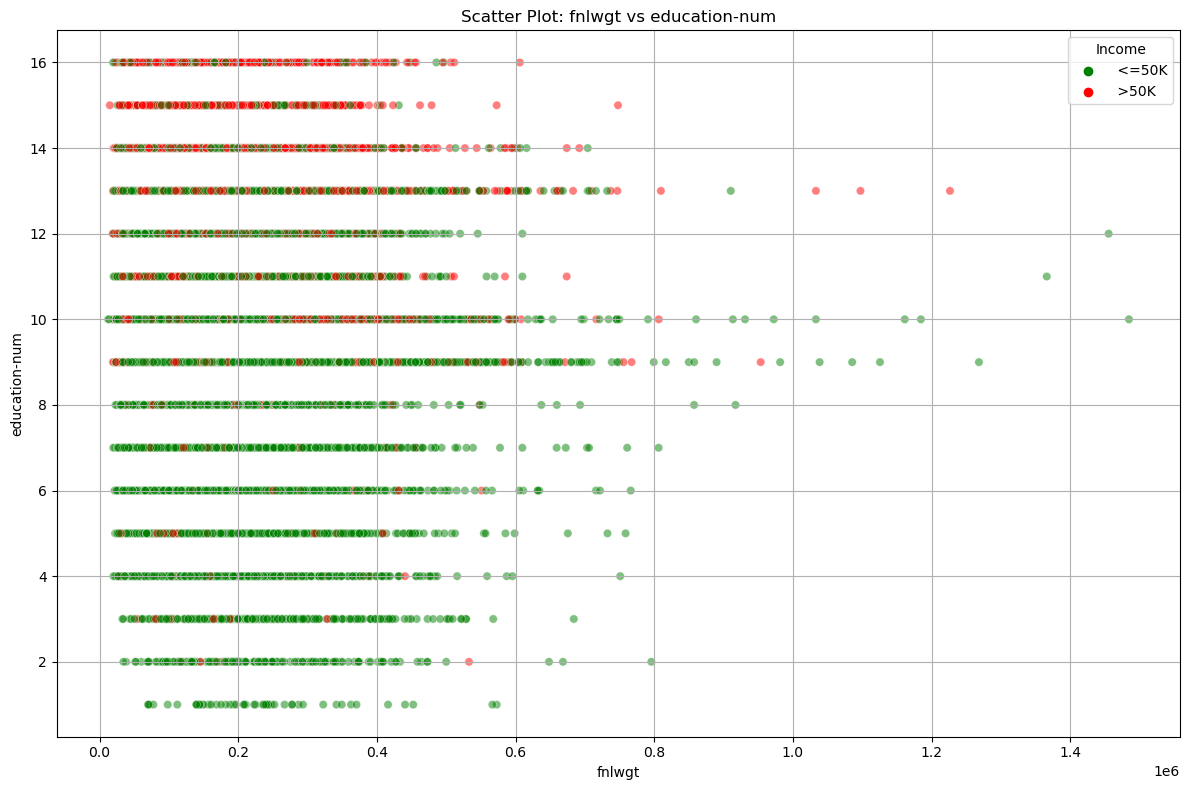

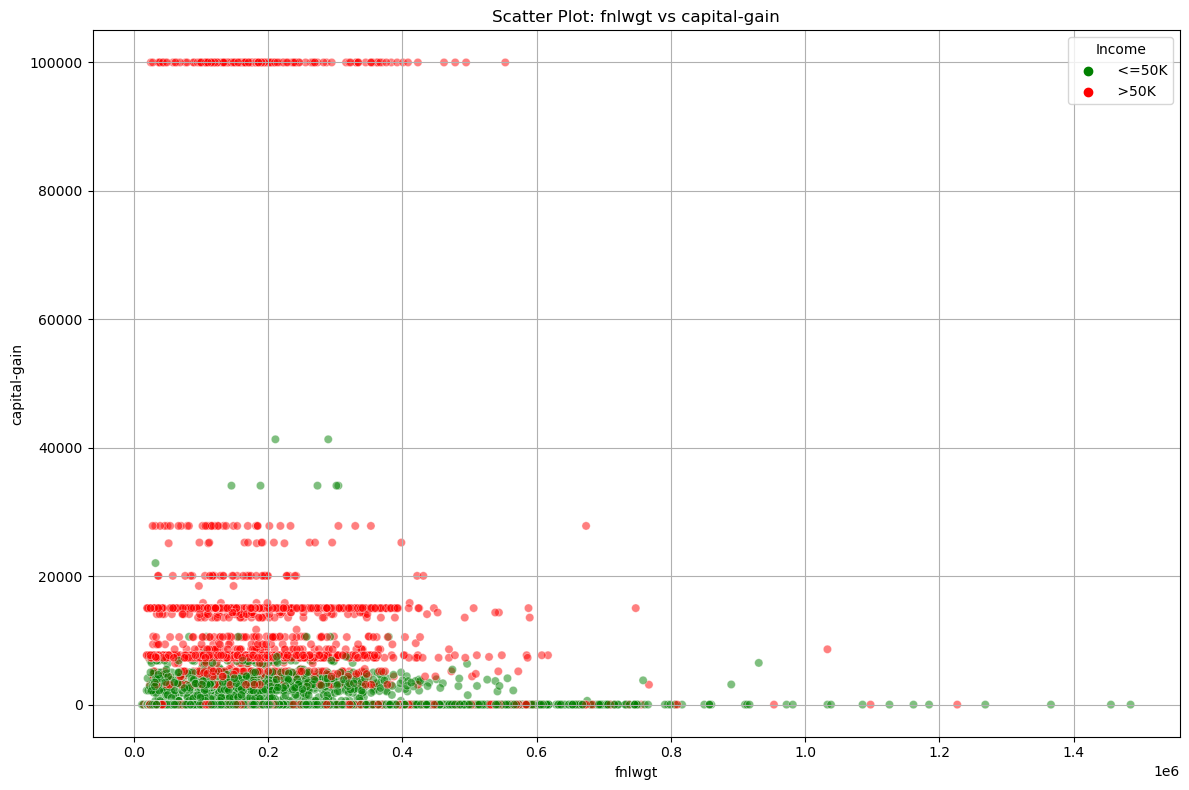

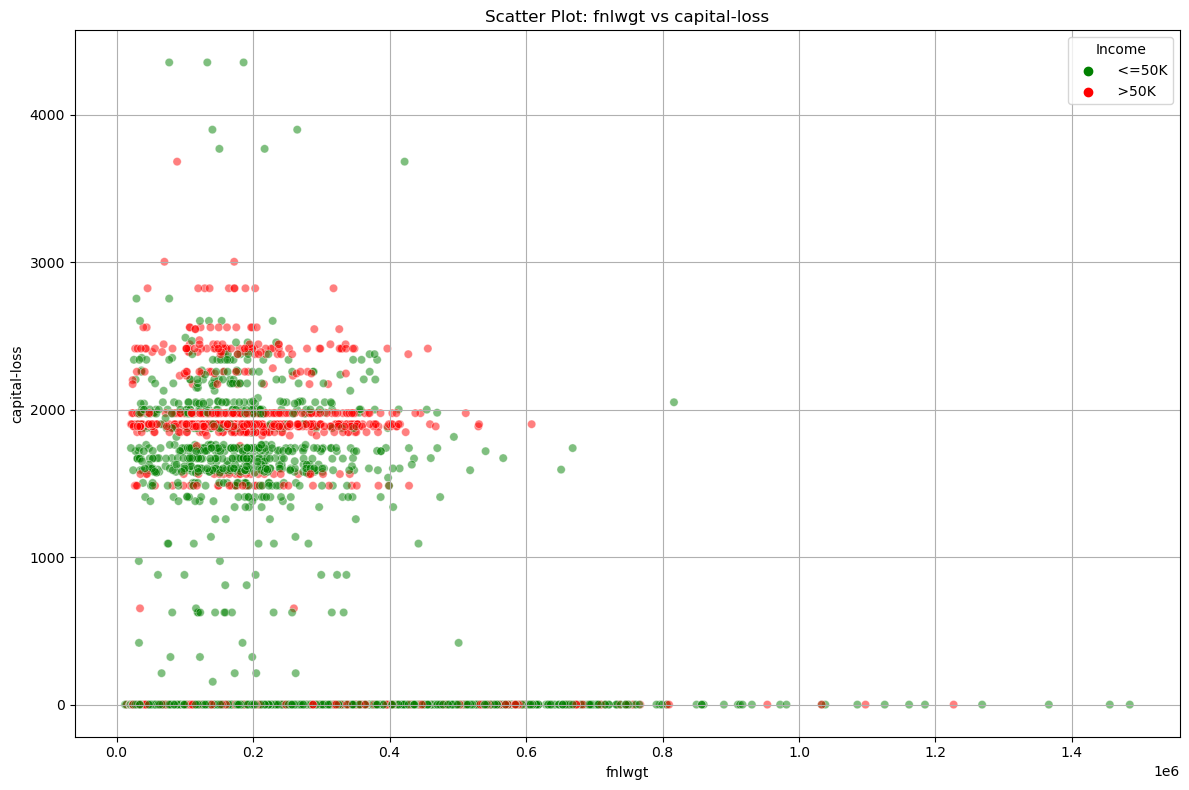

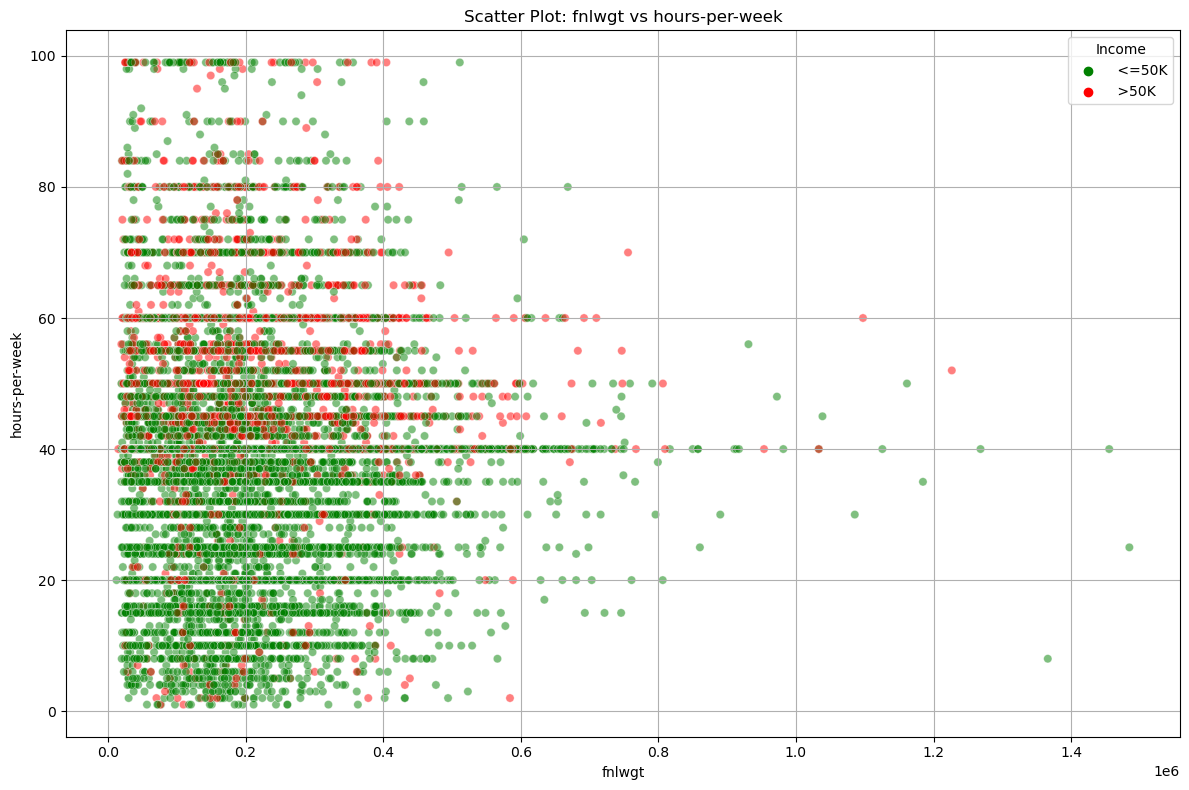

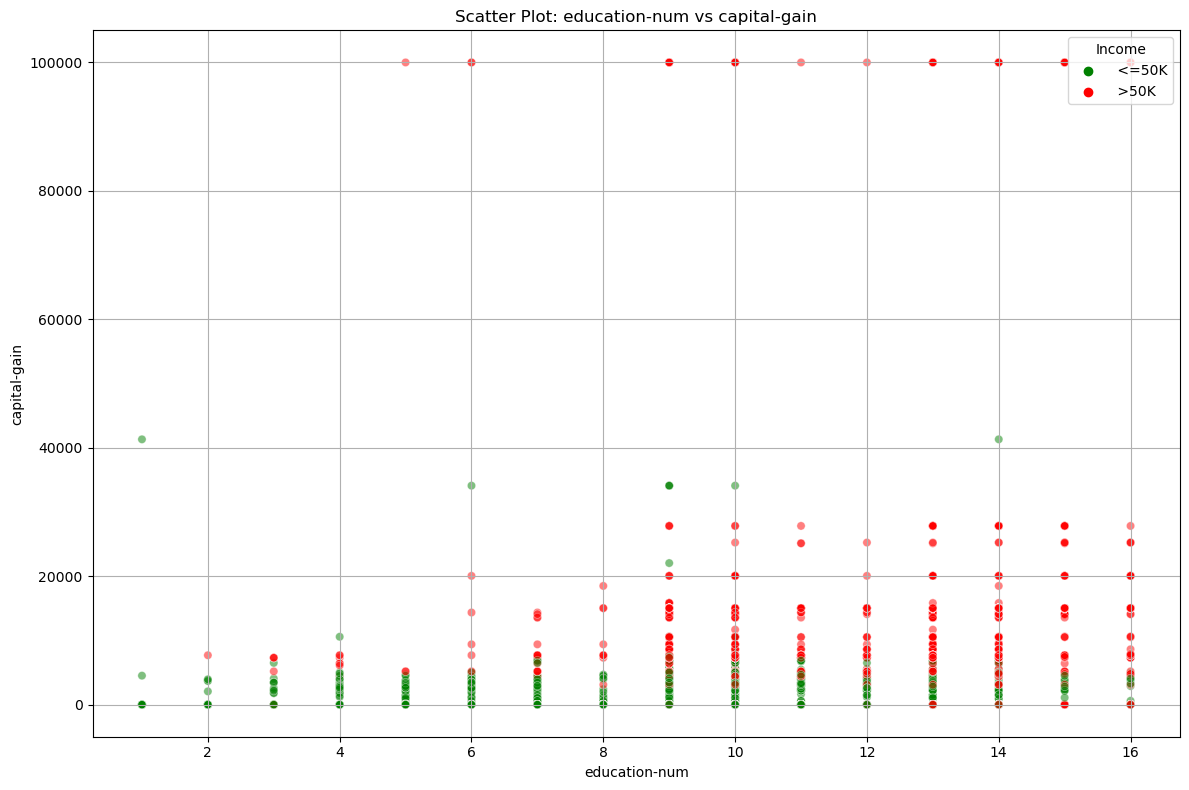

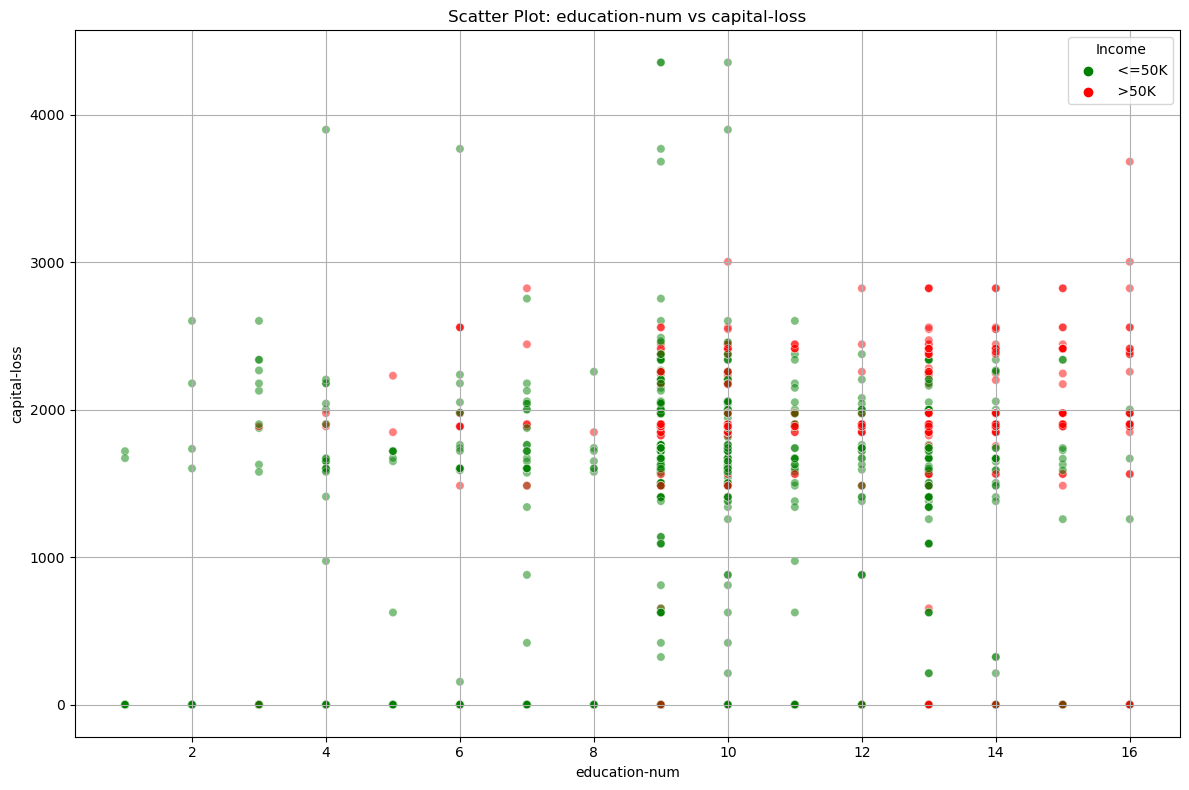

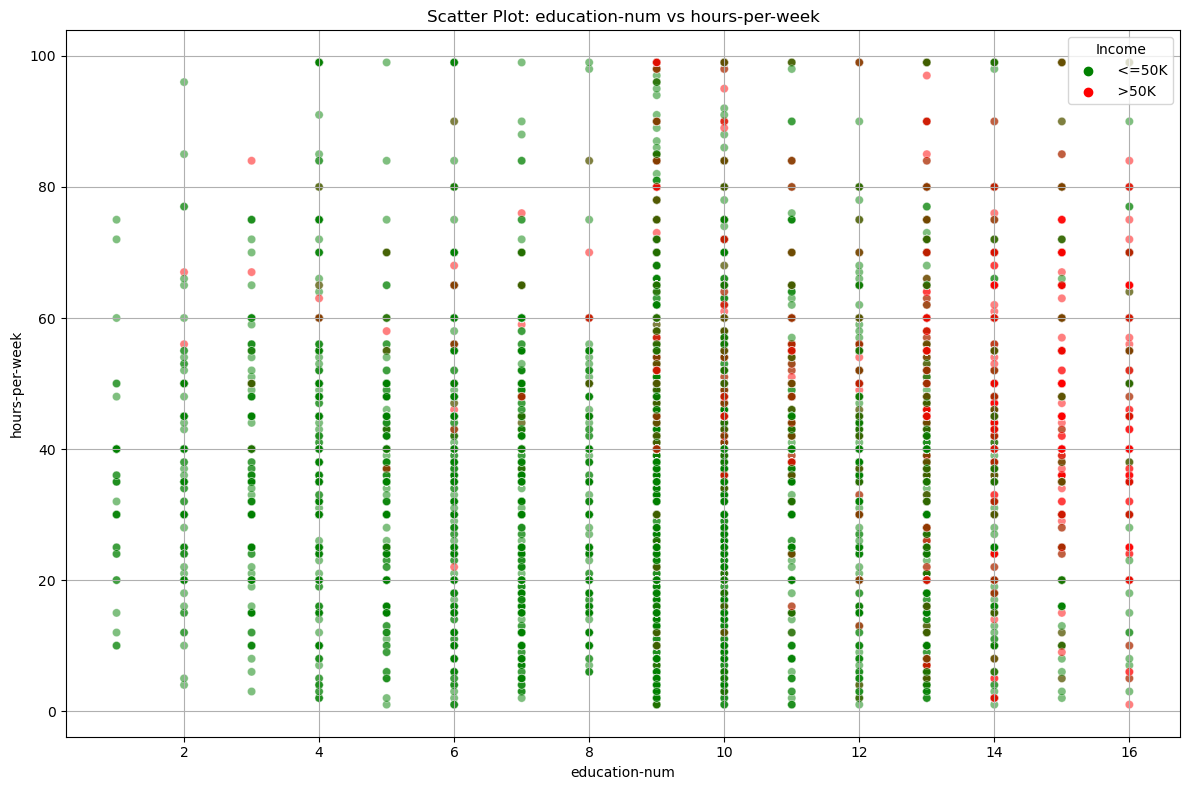

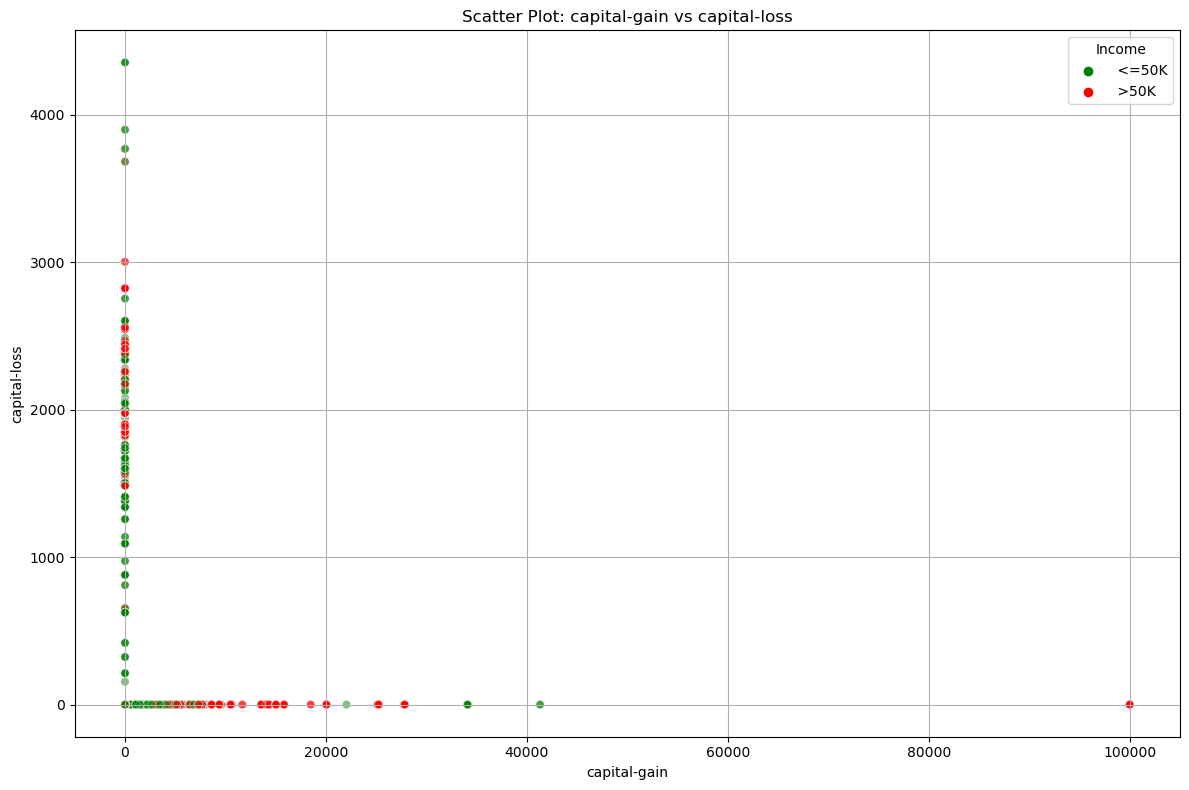

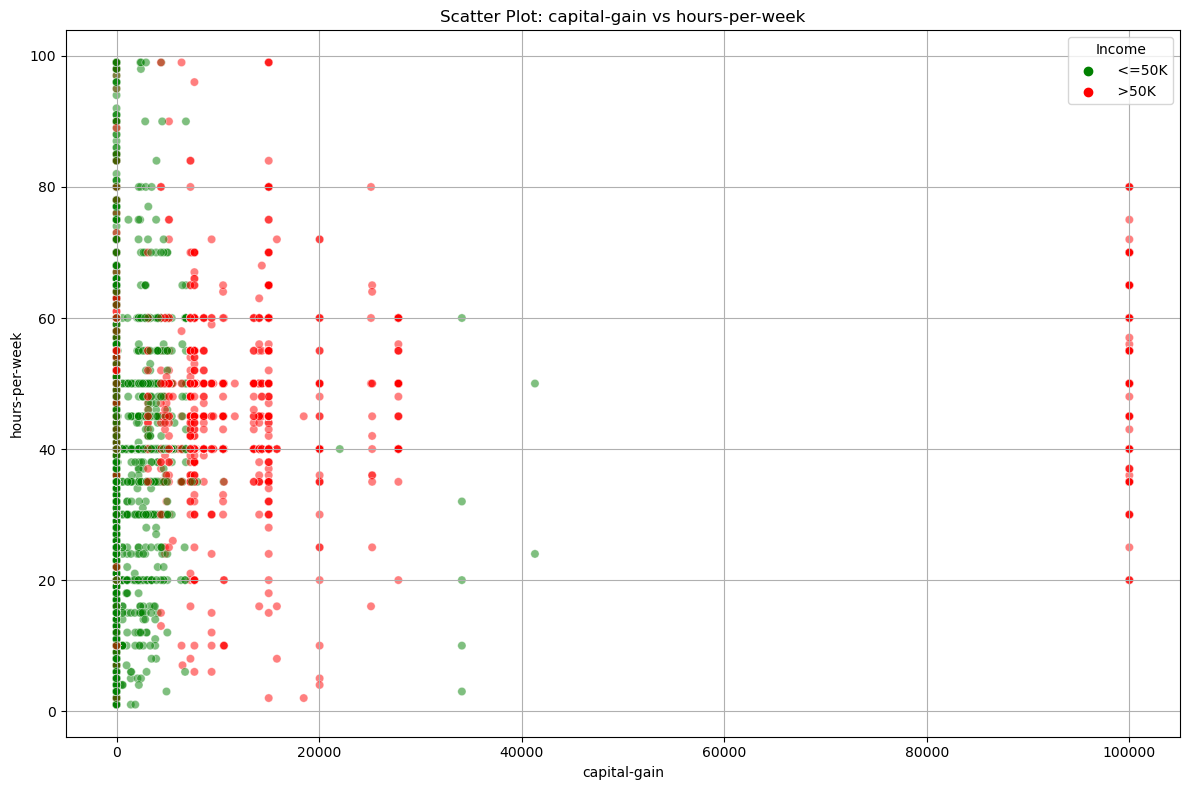

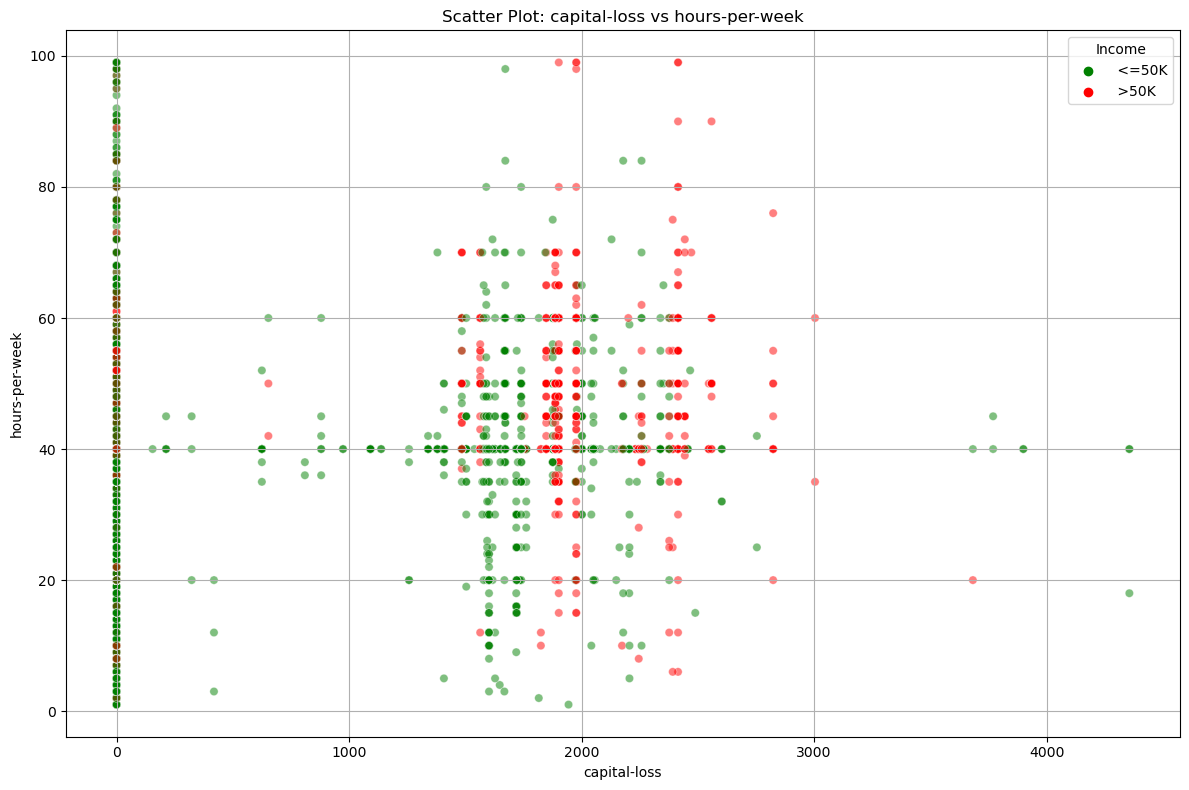

In [12]:
# Question 8: For each pair of numeric variables, construct a scatter plot of the variables. Discuss the results.

for i in range(len(numeric_vars)):
    for j in range (i+1, len(numeric_vars)):
        var1 = numeric_vars[i]
        var2 = numeric_vars[j]
        
        plt.figure(figsize=(12, 8))
        sns.scatterplot(data=adult_data, x=var1, y=var2, hue='income', palette=['green', 'red'], alpha=0.5)
        plt.title(f'Scatter Plot: {var1} vs {var2}')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.legend(title='Income', loc='upper right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()        
        
# Age vs. Fnlwgt (Weight): The income >50 is more concentrated between age 30 to 65 where as I observe that income >50 is scattered across the fnlwgt range.
# Age vs. Education-Num: The income >50 is more concentrated above the Education-Num greter than 10. It is getting densed as the value increases. As well, the age range for income >50 also increases when education-num increases after education-num > 10. 
# age vs capital-gain: There is clear pattern seen for capital-gain. There is high concentracted spots of income >50 values for capital-gain above ~ 8000 between 22 - 72 age range. But there are many outlier data. 
# age vs capital-loss: There is clear pattern seen for capital-loss. I observe high concentracted spots of income >50 for capital-loss around ~20000 for capital-loss and between 25 - 60 age range.
# age vs hours-per-week: Although it is not noticable pattern. But, I observe densed spot of income >50 income between 40-60 hours-per-week and age above 30.

# fnlwgt vs education-num: The income >50 is more concentrated above Education-Num greter than 10 where as the income >50 is scattered across the fnlwgt range.
# fnlwgt vs capital-gain: There is high concentracted spots of income >50 value for capital-gain above ~ 8000 regardless of fnlwgt value.
# fnlwgt vs capital-loss: There is high concentracted spots of income >50 for capital-loss around ~20000 across the fnlwgt range.
# fnlwgt vs hours-per-week: Although it is not noticable pattern. But, I observe densed spot of income >50 income between 40-60 hours-per-week

# education-num vs capital-gain: The income >50 are more likely when Education-Num is greater than 10 and capital-gain above ~8000
# education-num vs capital-loss: The income >50 are more likely when Education-Num is greater than 10 and capital-loss around ~2000
# education-num vs hours-per-week: The income >50 are more likely when Education-Num is greater than 10 where as hours-per-week does not matter.

# capital-gain vs capital-loss: The income >50 are more likely when capital-gain above ~8000 and capital-loss around ~2000
# capital-gain vs hours-per-week: The income >50 are more likely when capital-gain above ~8000 where as the hours-per-week does not matter.


In [14]:
# Ans 9
# 1. Education-num variable is numerical (encoded) representation of Education variable.
# 2. Following group of variables has good corelation with each other:
#    a. Workclass and Occupation
#    b. Maraital-Status and Relationship
#    c. sex and hours-per-week



# And 10:
######## Summarization ######
#  1. Education-num variable is numerical (encoded) representation of Education variable. So we can eleminate Education column from training.
#  2. The Workclass, Marital-status, Relationship, Race and native-country feature's data distribution across its category is baised. So we can ignore this feature as it could skew the model in one direction.
#  3. The capital-gain and capital-loss seems to be anamalous field because:
#     (a) its min - max range is very high.
#     (b) their 25%, 50% and 75% percentiles are zero.
#     So, it can skew the result and make it baised.
#  4. The income does not have significant dependenency on 'fnlwgt' and 'hours-per-week' variable.
#
#  5. The target income label is significantly depends on Sex, Occupation, education-num, Age indipendent variables.
#     (a) The income >50 is more concentrated between age 30 to 65
#     (b) The income >50 are more likely when Education-Num is greater than 10.
#     (c) The Occupation category 'Exec-Managarial' and 'Prof-specialty' likely to have >50. The chances are closely 40%. The other occupation will have <=50 with probability less than 20%.
#     (d) Male would have more chance to have income >50 than Female. The possibility to have income >50 to male is ~ 45% where as female ~ 20%.
#
#  6. We can include capital-gain & capital-loss if we filter out the outlier data like capital-gain & capital-loss = 0 and capital-gain=99999 & capital-loss > 3500